Import the nessecary libraries, and add labels to the dataset.
Create a CSV file from that new data set and save it as a CSV file.
Use that CSV file as the main data set from now on.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32


'''
#---------read the attribute names first------------------
with open('Names.txt', 'r') as file:
    attributes = file.readlines()
columnNames = [line.split()[-2] for line in attributes if line.startswith('@attribute')]        #we are only interested in the name itself, delete everything else

#---------read the data-----------------
dataset = pd.read_csv('communities.data', header=None)
dataset.columns = columnNames
#dataset.to_csv('DatasetWithHeaders', index=False)      #Only need to run this once, so therefore its out
'''
datasetWithHeaders = pd.read_csv('DatasetWithHeaders')  #The new dataset with labels.



Check for the min, max, mean, std, median, mode, and null (if there are any missing data its = ?)

<function matplotlib.pyplot.show(close=None, block=None)>

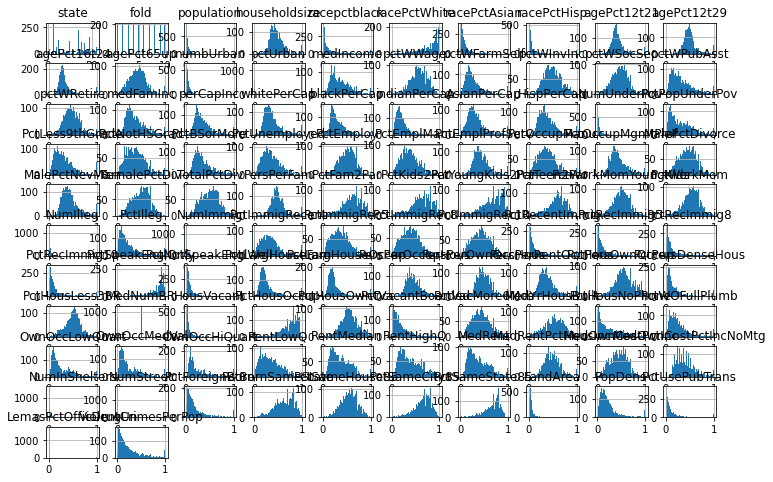

In [15]:
population_min = datasetWithHeaders['population'].min()

# Calculate Maximum (Max)
population_max = datasetWithHeaders['population'].max()

# Calculate Mean
population_mean = datasetWithHeaders['population'].mean()

# Calculate Standard Deviation (SD)
population_std = datasetWithHeaders['population'].std()

# Calculate Median
population_median = datasetWithHeaders['population'].median()

# Calculate Mode
population_mode = datasetWithHeaders['population'].mode().values[0]  # Mode may have multiple values, we take the first one

# Count Missing Values
missing_values = datasetWithHeaders['population'].isnull().sum()

# Print the results
'''
print(f"Minimum (Min): {population_min}")
print(f"Maximum (Max): {population_max}")
print(f"Mean: {population_mean}")
print(f"Standard Deviation (SD): {population_std}")
print(f"Median: {population_median}")
print(f"Mode: {population_mode}")
print(f"Missing Values: {missing_values}")
print(f"Top 10 results from data: \n {datasetWithHeaders.head(10)}")
'''
datasetWithHeaders.hist(bins = 50, figsize=(12,8) )
plt.show

We have a supervised task. Its a multiple regression (a univariate regression because we are only trying to predict a single value) task, and we will use batch learning.

We will start with setting aside 20% of the data for Testing. This will be chosen randomly.



In [17]:
def isIdInTestSet(identifier, testRatio):
    return crc32(np.int64(identifier)) < testRatio * 2 **32

def splitDataWithId(data, testRatio, idColumn):
    ids = data[idColumn]
    inTestSet = ids.apply(lambda id: isIdInTestSet(id, testRatio))
    return data.loc[~inTestSet], data.loc[inTestSet]
dataWithId = datasetWithHeaders.reset_index()
trainSet, testSet = splitDataWithId(dataWithId, 0.2, "index")

'''
def testSet20Percent (data, testRatio):
    shuffleIndices = np.random.permutation(len(data))
    testSetSize = int(len(data)*testRatio)
    testIndices = shuffleIndices[:testSetSize]
    trainIndices = shuffleIndices[testSetSize:]
    return data.iloc[trainIndices], data.iloc[testIndices]

trainSet, testSet = testSet20Percent(datasetWithHeaders,  0.2)
'''
print(f"Length of trainSet: {len(trainSet)}")   #Should be roughly 80% of the data
print(f"Length of testSet: {len(testSet)}")     #Should be roughly 20% of the data

Length of trainSet: 1596
Length of testSet: 398
